In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA




In [338]:
# def shuffle_along_axis(a, axis):
#     idx = np.random.rand(*a.shape).argsort(axis=axis)
#     return np.take_along_axis(a,idx,axis=axis)

xls = pd.ExcelFile("/home/aileen/ORCAgym/gym/scripts/mini_cheetah_logs.xlsx")
df1 = pd.read_excel(xls, 'q').to_numpy()[:,9:12]
#df2 = pd.read_excel(xls, 'qd').to_numpy()
#tau = pd.read_excel(xls, 'tau').to_numpy()

df_feet_contacts = pd.read_excel(xls,'grf').to_numpy()

#df_shuffled = shuffle_along_axis(df1,0)
# df1 = shuffle_along_axis(df1,0)

df1 = np.random.permutation(df1[:,0])
df1 = df1[np.random.permutation(np.arange(df1.shape[0])), :]

print(df1.shape)

(50050,)


[ 0.02897564 -0.78196044  1.54992202]
[ 0.02897564 -0.78196044  1.54992202]


ValueError: s must be a scalar, or float array-like with the same size as x and y

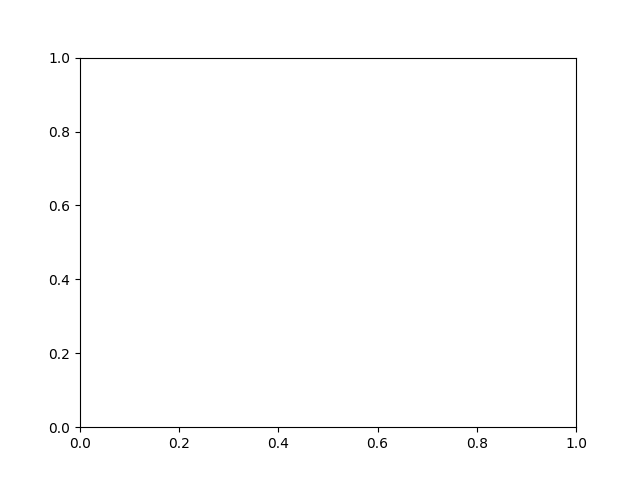

In [354]:
import sklearn

df1 = pd.read_excel(xls, 'q').to_numpy()[:,9:12]
df_shuffled = sklearn.utils.shuffle(df1)

df1_mean = np.mean(df1, axis=0)
df_shuffled_mean = np.mean(df_shuffled, axis=0)
print(df1_mean)
print(df_shuffled_mean)

df1_norm = df1 - df1_mean
df_shuffled_norm = df_shuffled - df_shuffled_mean


plt.cla()
fig = plt.figure()
plt.scatter(df1_norm[:, 0], df1_norm[:, 1], df1_norm[:, 2], 'red')
plt.scatter(df_shuffled_norm[:, 0], df_shuffled_norm[:, 1], df_shuffled_norm[:, 2])
plt.show()


pca_1 = PCA(n_components=3)
pca_shuffled = PCA(n_components=3)
pc_1 = pca_1.fit_transform(df1_norm)
pc_shuffled = pca_shuffled.fit_transform(df_shuffled_norm)

print(pca_1.components_)
print(pca_shuffled.components_)

In [340]:
np.random.permutation(np.arange(df1.shape[0]))

array([25313,  7912, 36198, ..., 25579, 26843, 28005])

In [341]:
#PCA
df_shuffled = sklearn.utils.shuffle(df1)

dataset = pd.DataFrame(df_shuffled)
features = ['1_rf_haa', 'rf_hfe', 'rf_kfe', '2_lf_haa', 'lf_hfe', 'lf_kfe', '3_rh_haa', 'rh_hfe', 'rh_kfe', '4_lh_haa', 'lh_hfe', 'lh_kfe'][9:12]
dataset.columns = features

features = np.char.mod('%s', features).tolist()
x = dataset.loc[:, features].values
print(dataset.loc[:, features].values.shape)
x = StandardScaler().fit_transform(x) # normalizing the features
print(x.shape)
print(np.mean(x[:,1]),np.std(x[:,1]))
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised = pd.DataFrame(x,columns=feat_cols)
print(normalised.tail())

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

print(pca.components_)
print(sum(pca.components_[:,0]*pca.components_[:,1]))
print(sum(pca.components_[:,1]*pca.components_[:,2]))
print(sum(pca.components_[:,2]*pca.components_[:,0]))


principal_Df = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

#print(principal_Df.tail())

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

#print(swing_dataset['label'] )



(50050, 3)
(50050, 3)
-2.1131725518060123e-16 1.0000000000000013
       feature0  feature1  feature2
50045 -0.802128 -0.013940  0.727944
50046 -0.010162 -1.055352  0.299491
50047 -0.499800 -2.982903  1.590129
50048  0.559808  1.187040 -0.831179
50049  0.339325  1.340672  1.381058
[[ 0.08899281  0.69464256 -0.71382911]
 [-0.9581873   0.25538254  0.12906142]
 [-0.27195105 -0.67249645 -0.68832489]]
8.326672684688674e-17
1.6653345369377348e-16
5.551115123125783e-17
Explained variation per principal component: [0.41468235 0.33969713 0.24562052]


In [342]:
import math  
a = pca.components_[:,0]
b = pca.components_[:,1]
c= pca.components_[:,2]
print(np.dot(a,b))
print(math.acos(np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))))
print(math.pi/2)

print(math.acos(np.dot(c,b)/(np.linalg.norm(c)*np.linalg.norm(b))))


print(math.acos(np.dot(c,a)/(np.linalg.norm(c)*np.linalg.norm(a))))



1.0888963045878612e-16
1.5707963267948966
1.5707963267948966
1.5707963267948963
1.5707963267948966


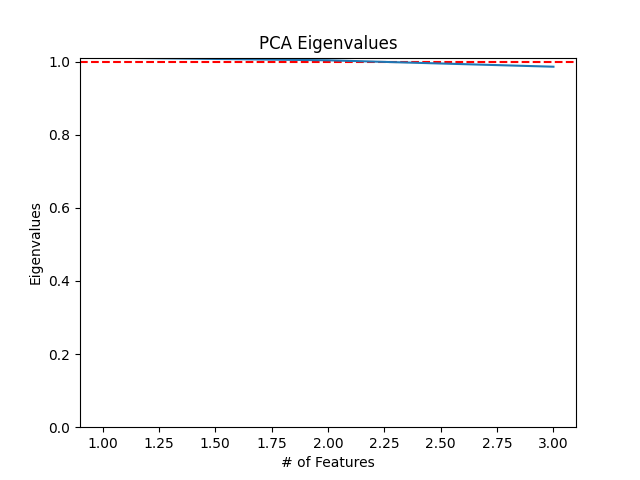

/home/aileen/anaconda3/envs/gpugym/lib/python3.8/site-packages/matplotlib/collections.py:981: RuntimeWarning:

invalid value encountered in sqrt

/home/aileen/anaconda3/envs/gpugym/lib/python3.8/site-packages/matplotlib/collections.py:981: RuntimeWarning:

invalid value encountered in sqrt



In [ ]:
plt.cla()
fig = plt.figure()
plt.ylabel('Eigenvalues')
plt.xlabel('# of Features')
plt.title('PCA Eigenvalues')
plt.ylim(0,max(pca.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1,color='r',linestyle='--')
plt.plot([1,2,3],pca.explained_variance_)
plt.show()

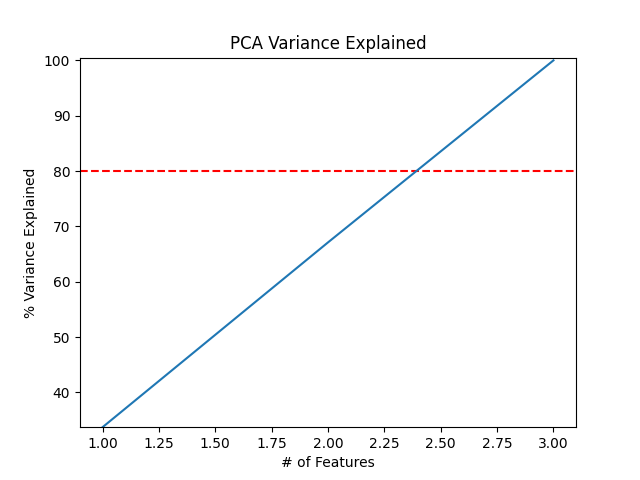

In [ ]:
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance,decimals = 3)*100)

fig = plt.figure()
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var),100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80,color='r',linestyle='--')
plt.plot([1,2,3],var)
plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)



[[ 0.11071345 -0.97649994 -0.20039428]
 [ 0.86418528  0.26026334 -0.49554669]
 [-0.88805473  0.13152801 -0.50721029]]
[1.24407189 1.01911175 0.7368763 ]


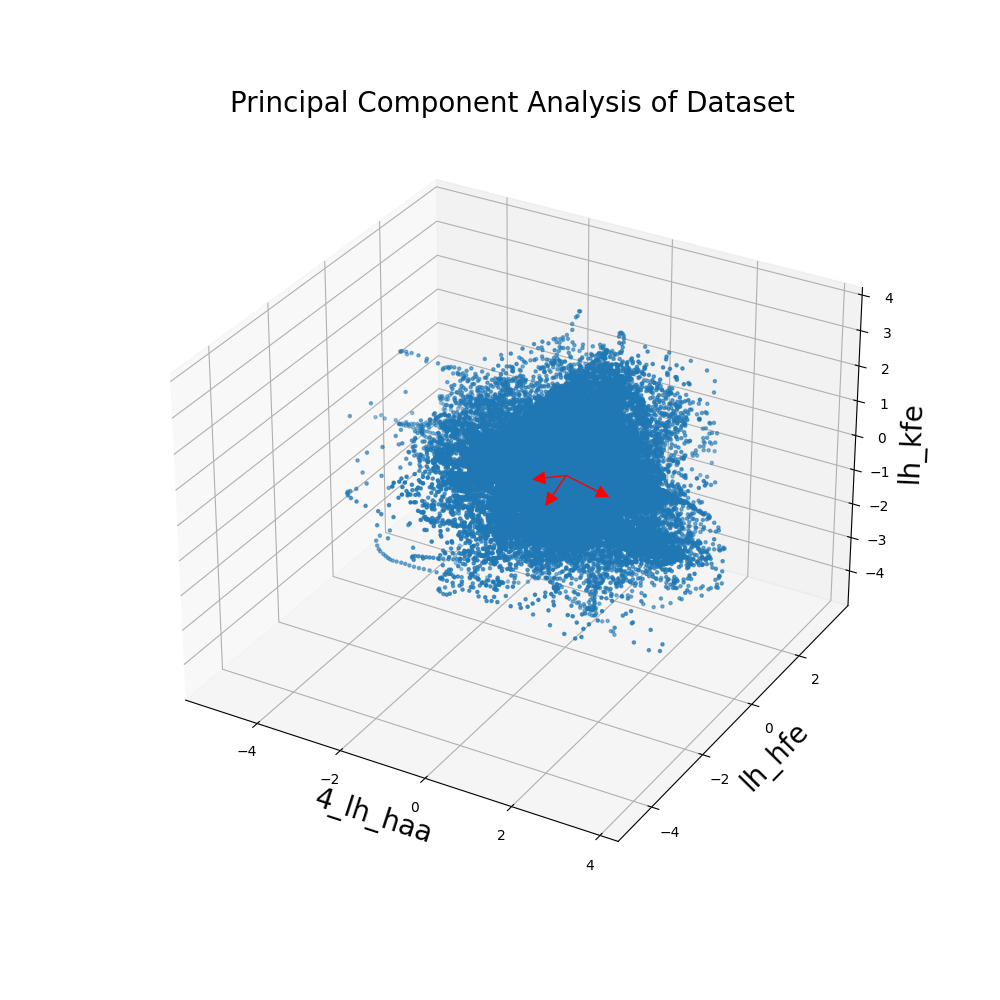

In [384]:
%matplotlib widget
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(normalised.loc[:,"feature0"],normalised.loc[:,"feature1"],normalised.loc[:,"feature2"],s=5)
    # #principal_Df.loc[:, 'principal component 1']
    #         , principal_Df.loc[:, 'principal component 2']
    #         ,principal_Df.loc[:, 'principal component 3'], s = 5)
eigenvalues = pca.explained_variance_
coeff = pca.components_.T* (eigenvalues)
lambda_pca = pca.singular_values_
print(coeff)
print(eigenvalues)

for i in range(3):
        arrow_prop_dict = dict(mutation_scale=20, arrowstyle='-|>', color='r', shrinkA=0, shrinkB=0)

        a = Arrow3D([0,coeff[i,0]], [0,coeff[i,1]], [0,coeff[i,2]], **arrow_prop_dict)
        ax.add_artist(a)
        #plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, coeff[i,2]*1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')

plt.title(f"Principal Component Analysis of Dataset",fontsize=20)
ax.set_xlabel(features[0],fontsize=20)
ax.set_ylabel(features[1],fontsize=20)
ax.set_zlabel(features[2],fontsize=20)
plt.show()
#plt.savefig(f'pca plot')


In [402]:

df_phase = pd.read_excel(xls, 'oscillators_phase').to_numpy() #only 1 column
#df_feet_contacts = pd.read_excel(xls,'feet_contact_forces').to_numpy()

keys = features #for humanoid: ["right_hip_yaw", "right_hip_abad","right_hip_pitch","right_knee","right_ankle","left_hip_yaw","left_hip_abad","left_hip_pitch","left_knee","left_ankle"]
n= 50 #16 for humanoid
m=12 #10 for humanoid
data = dict.fromkeys(keys, np.empty((0,n)))
new_q = np.empty((0,n))
new_q_norm = np.empty((0,n))

R = pca.components_.T
print(df1_norm.shape)
print(R)

rotated = np.matmul(R,df1_norm.T).T
phase_env1 = np.empty((0,n))
phase_env2 = np.empty((0,n))
phase_env3 = np.empty((0,n))
phase_env4 = np.empty((0,n))
phases = [phase_env1, phase_env2, phase_env3, phase_env4]
for i in range(0,df_phase.shape[0], n):
    for p in range(len(phases)):
        phases[p] = np.vstack([phases[p],df_phase[i:i+n,p:p+1].T])
    new_q = np.vstack([new_q, rotated[i:i+n,0:1].T])
    new_q_norm = np.vstack([new_q, df1_norm[i:i+n,0:1].T])



(50050, 3)
[[ 0.08899281 -0.9581873  -0.27195105]
 [ 0.69464256  0.25538254 -0.67249645]
 [-0.71382911  0.12906142 -0.68832489]]


(1001, 50)
(1001, 50)
1001
(50050, 3)


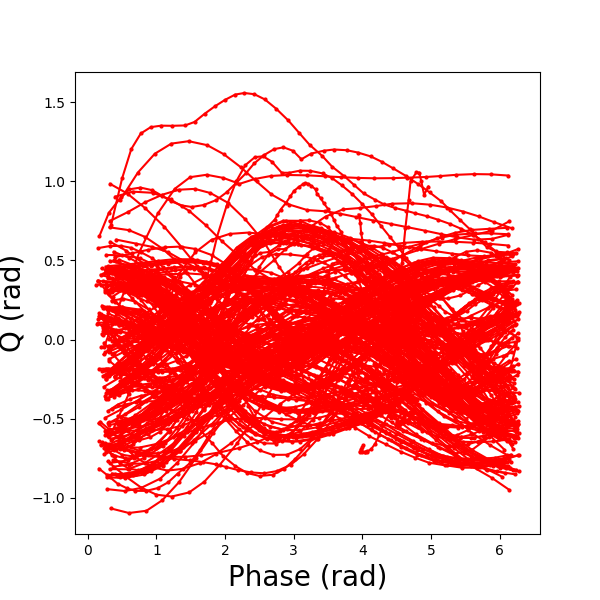

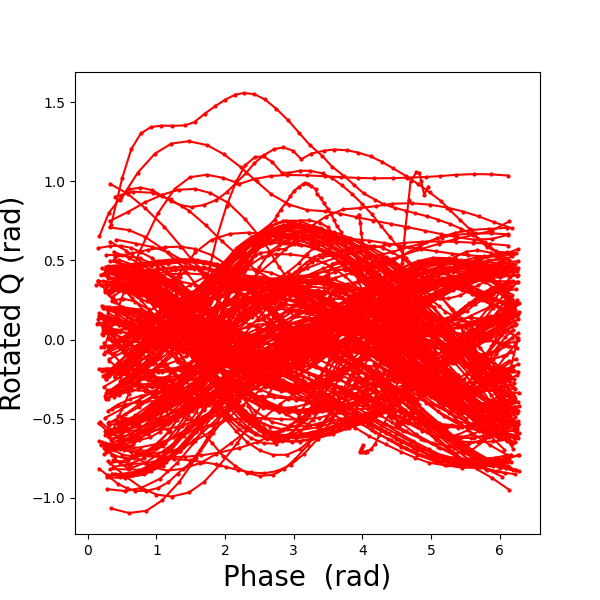

In [403]:
last = 0
fig = plt.figure(figsize=(6,6))
print(new_q.shape)
print(phases[3].shape)
print(len(phases[3][:,0]))
for j in range(0,10):
    for p in range(1,len(phases[3][:,j])):
        if phases[3][p,j] < phases[3][p-1,j]:
            line, = plt.plot(phases[3][last:p,j],new_q[last:p,j],"-o", markersize=2, color='r')
            last = p+1

plt.ylabel('Rotated Q (rad)',fontsize=20)
plt.xlabel('Phase  (rad)',fontsize=20)
fig = plt.figure(figsize=(6,6))

last = 0
print(df1_norm.shape)
for j in range(0,10):
    for p in range(1,len(phases[3][:,j])):
        if phases[3][p,j] < phases[3][p-1,j]:
            line, = plt.plot(phases[3][last:p,j],new_q_norm[last:p,j],"-o", markersize=2, color='r')
            last = p+1
plt.ylabel('Q (rad)',fontsize=20)
plt.xlabel('Phase (rad)',fontsize=20)
plt.show()
